The Simple Linear Regression
The easiest regression model is the simple linear regression:

Y = β0 + β1 * x1 + ε.

Y is the variable we are trying to predict and is called the dependent variable. X is an independent variable.

 

In [22]:
#import important libraries
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np


In [3]:
import statsmodels.api as sm

In [4]:
#read input excel file
data = pd.read_csv("1.01. Simple linear regression.csv")

In [13]:
data.head(20)


,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


In [6]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [14]:
y = data['GPA']
x1 = data['SAT']

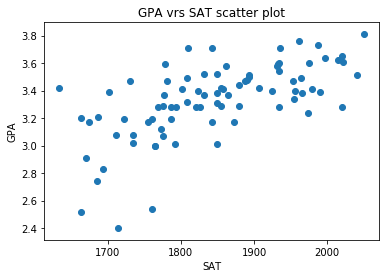

In [15]:
#visualizing the data
pt.scatter(x1,y)
pt.xlabel('SAT')
pt.ylabel('GPA')
pt.title('GPA vrs SAT scatter plot')
pt.show()

A linear regression line has the equation Y = mx+c, where m is the coefficient of independent variable and c is the intercept.

The mathematical formula to calculate slope (m) is:

(mean(x) * mean(y) – mean(x*y)) / ( mean (x)^2 – mean( x^2))

The formula to calculate intercept (c) is:

mean(y) – mean(x) * m

WE use:
m = (x - xbar)(y- ybar)/(x - xbar)^2
c = y-Intercept

In [30]:
# Calculating mean of x1

mean_x1 = np.mean(x1)
print(mean_x1)

1845.2738095238096


In [132]:
'''def mean(list):
    xSum = 0.0;
    count = 0;
    xbar = 0.0;
    for x in list:
        xSum = float(x) + xSum;
        count = count+1;
        xbar= float(xSum)/count;
    print(xbar)
    '''

'def mean(list):\n    xSum = 0.0;\n    count = 0;\n    xbar = 0.0;\n    for x in list:\n        xSum = float(x) + xSum;\n        count = count+1;\n        xbar= float(xSum)/count;\n    print(xbar)\n    '

In [162]:
X =data['SAT'].values


84

In [163]:
Y =data['GPA'].values
len(Y)

84

In [281]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
 
# Total number of values
n = len(X)

def slope_intercept(mean_x,mean_y):
    # Using the formula to calculate m and c
    numer = 0
    denom = 0
    for i in range(n):
        numer += (X[i] - mean_x) * (Y[i] - mean_y)
        denom += (X[i] - mean_x) ** 2
        m = numer / denom
        c = mean_y - (m * mean_x)

slope_intercept(mean_x,mean_y)
# Print coefficients
print(m, c)

0.001655688050092815 0.2750402996602781


The value of m and c from above will be added to this equation

y = mx + c
GPA = m(SAT) + c

Now since we have equation of line. We will predict value of y for each value of x and plot it to get the regression line.


In [133]:
# Plotting Values and Regression Line
min_x = np.min(X)-134
max_x =np.max(X)+150

In [268]:
'''''# Calculating line values x and y
#x = np.linspace(min_x,max_x,num=84) 
y_pred =  m * X + c
y_pred

for i in range(n):
    y_pred2 = c + m * X[i]
    print(y_pred2)
print(y_pred)'''''

3.112889617519363
3.0301052150147223
3.1890512678236327
3.0648746640666715
3.078120168467414
3.0400393433152795
3.195674020024004
3.195674020024004
3.242033285426603
3.338063192331986
3.1476590665713124
3.2138865885750247
3.1476590665713124
3.1095782414191775
3.2105752124748395
3.374488329434028
3.1807728275731684
3.0466620955156505
3.3248176879312434
3.232099157126046
3.1907069558737255
3.1261351219201057
3.0284495269646294
3.0681860401668573
3.543368510543495
3.2983266791297585
3.2337548451761386
3.290048238879294
3.6195301608477646
3.2453446615267882
3.203952460274468
3.4771409885397824
3.2138865885750247
3.34634163258245
3.3877338338347704
3.336407504281893
3.268524294228088
3.5102547495416387
3.2171979646752105
3.3066051193802224
3.3628985130833784
3.338063192331986
3.5301230061427527
3.0930213609182493
3.56985951934498
3.462239796088947
3.295015303029573
3.5135661256418245
3.349653008682636
3.551646950793959
3.2585901659275307
3.34634163258245
3.4324374111872764
2.980434573511937

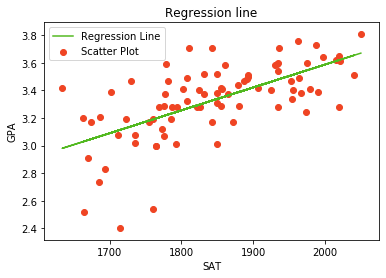

In [263]:
# Plotinxg Line
pt.plot(X, y_pred, color='#52b920', label='Regression Line')
# Ploting Scatter Points
pt.scatter(X, Y, c='#ef4423', label='Scatter Plot')
pt.xlabel('SAT')
pt.ylabel('GPA')
pt.title('Regression line')
pt.legend()
pt.show()

R Square Method – Goodness of Fit
R–squared value is the statistical measure to show how close the data are to the fitted regression line

Note: R-squared does not indicate whether a regression model is adequate.

y = actual value

y^= mean value of y

yp =  predicted value of y


R sq = (1 - [(yp - y^)/(y - y^)])

In [279]:
#ss_t is the total sum of squares and ss_r is the total sum of squares of residuals(relate them to the formula).
def r_square(m,c):
    ss_t = 0
    ss_r = 0
    for i in range(n):
        y_pred = c + m * X[i]
        ss_r += (Y[i] - y_pred) ** 2
        ss_t += (Y[i] - mean_y) ** 2
    r2 = 1 - (ss_r/ss_t)
    print(r2)

In [280]:
r_square(m,c)

[0.40600391]


#### Linear Regression – Implementation using scikit learn

In [277]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((n, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)
 
# Calculating R2 Score
r2_score = reg.score(X, Y)
 
print(r2_score)

0.40600391479679765
